## GOAL: analyse the data on what are the reasons a customer might churn and create a model to predict whether or not a customer will churn .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### We make a quick data check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


All our columns are complete with data, we are not missing anything

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


we can see that the tenure is from 1-72 months and the charges are from 18-118 and 18-8684$ monthly and total

## Exploratory Data Analysis:  General Feature Exploration

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we have not any null values in our dataset

##  Let's see the balance bertween yes and no churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

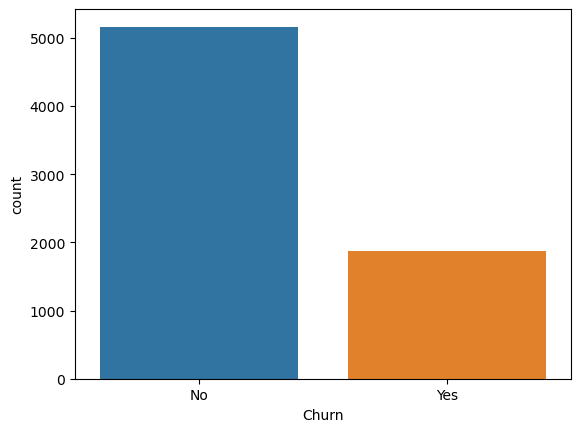

In [11]:
sns.countplot(data=df,x='Churn')

we can see roughly from the countplot that yes and no Churn are not extremly inbalanced, so we keep going

### With some box plots we will try to figure out the corellation between the contract type and the Total Charge of the services in relationship with the churn possibility

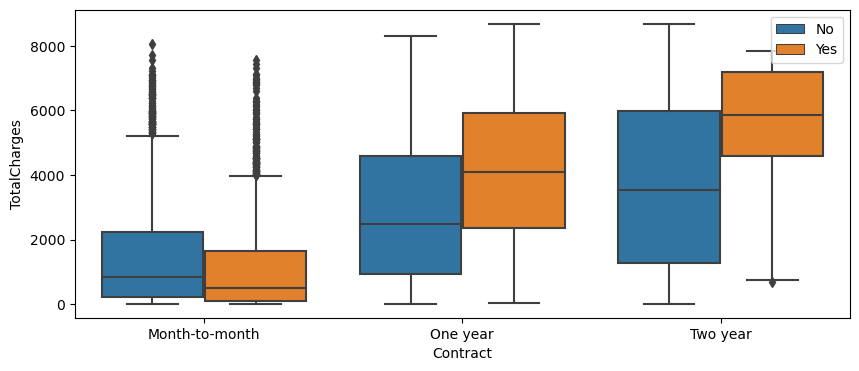

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=1)

There is a good amount of churns for one or two year contracts depending on the charging amounts. High charges high churn for one or two years contract. For monthly contracts is difficult to interpert because we don't know if the customer want's the service for just one month or they just drop-off because they are disstisfied.

### We will create a bar plot showing the correlation of the following features to the class label 'churn'. The features we will need are the following and because are categorical data we have to convert them into dummy variables first

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [4]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [5]:
corr_churn_yes = pd.DataFrame(corr_df['Churn_Yes'])
corr_churn_yes = corr_churn_yes.sort_values('Churn_Yes').drop(['Churn_No','Churn_Yes'],axis=0)
corr_churn_yes

,Churn_Yes
Contract_Two year,-0.301552
DeviceProtection_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
InternetService_No,-0.227578
TechSupport_No internet service,-0.227578
OnlineBackup_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


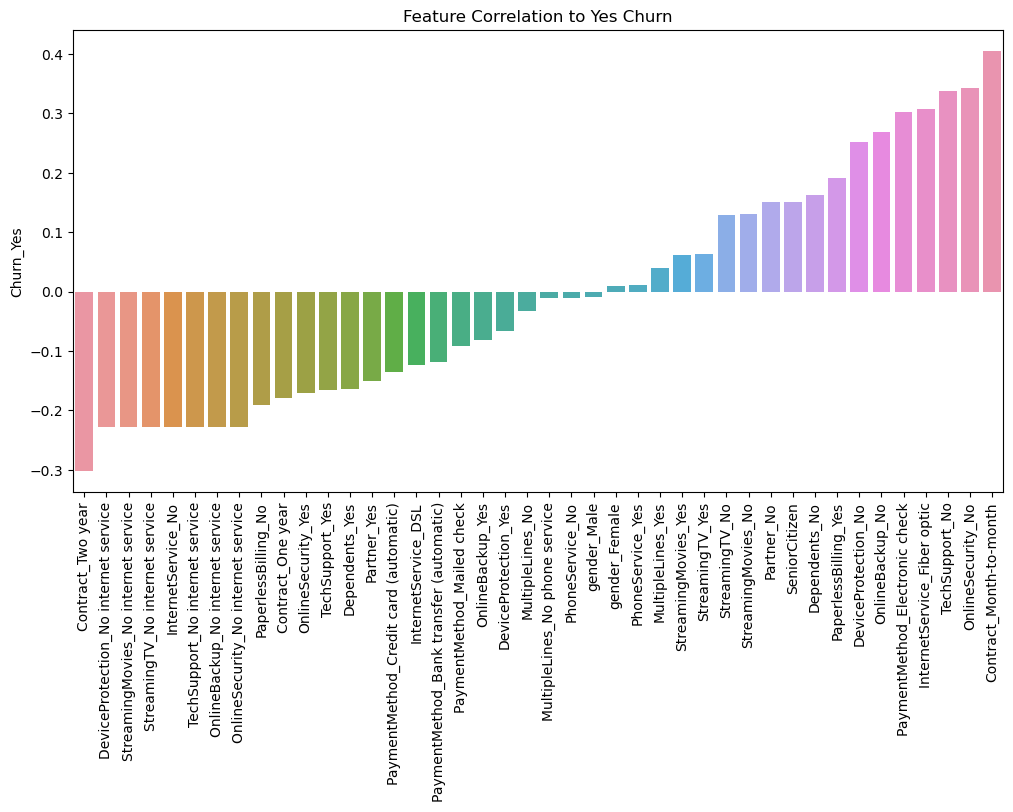

In [6]:
plt.figure(figsize=(12,6))
plt.title('Feature Correlation to Yes Churn')
sns.barplot(data=corr_churn_yes,x=corr_churn_yes.index,y='Churn_Yes')
plt.xticks(rotation=90);

We can see that churn is highly correlated is the month-to month contract(makes sense), but also Tech Support and Online Security are important features that affect the churn possibility, and the company must take care for the future.

## Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

The major contracts are from month-to-month. 

We can see it clearly from the histogram bellow, displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

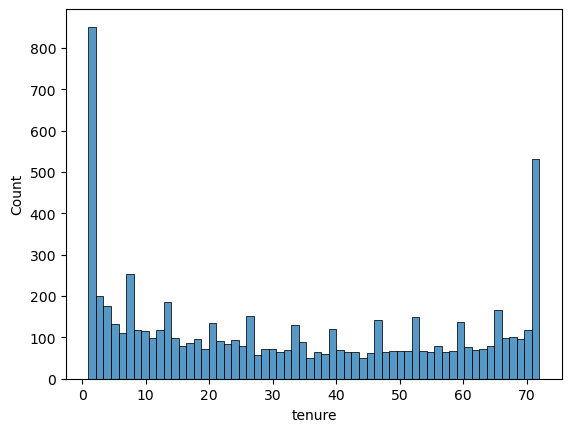

In [8]:
sns.histplot(data=df,x='tenure',bins=60)

In [60]:
df['tenure'].value_counts().sort_index()

1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 72, dtype: int64

### Insights: 

- There are a lot of customers that stay just one month.
- I need to check if this is due to they need the service for just one month or thete are other reasons for the churn.
- Aslo we see there are 'spikes' in our histogramm that maybe are yearly contracts, so better longstay contract with better dicount offers might be a good idea.

**We see the same thing from the histogramms bellow.**

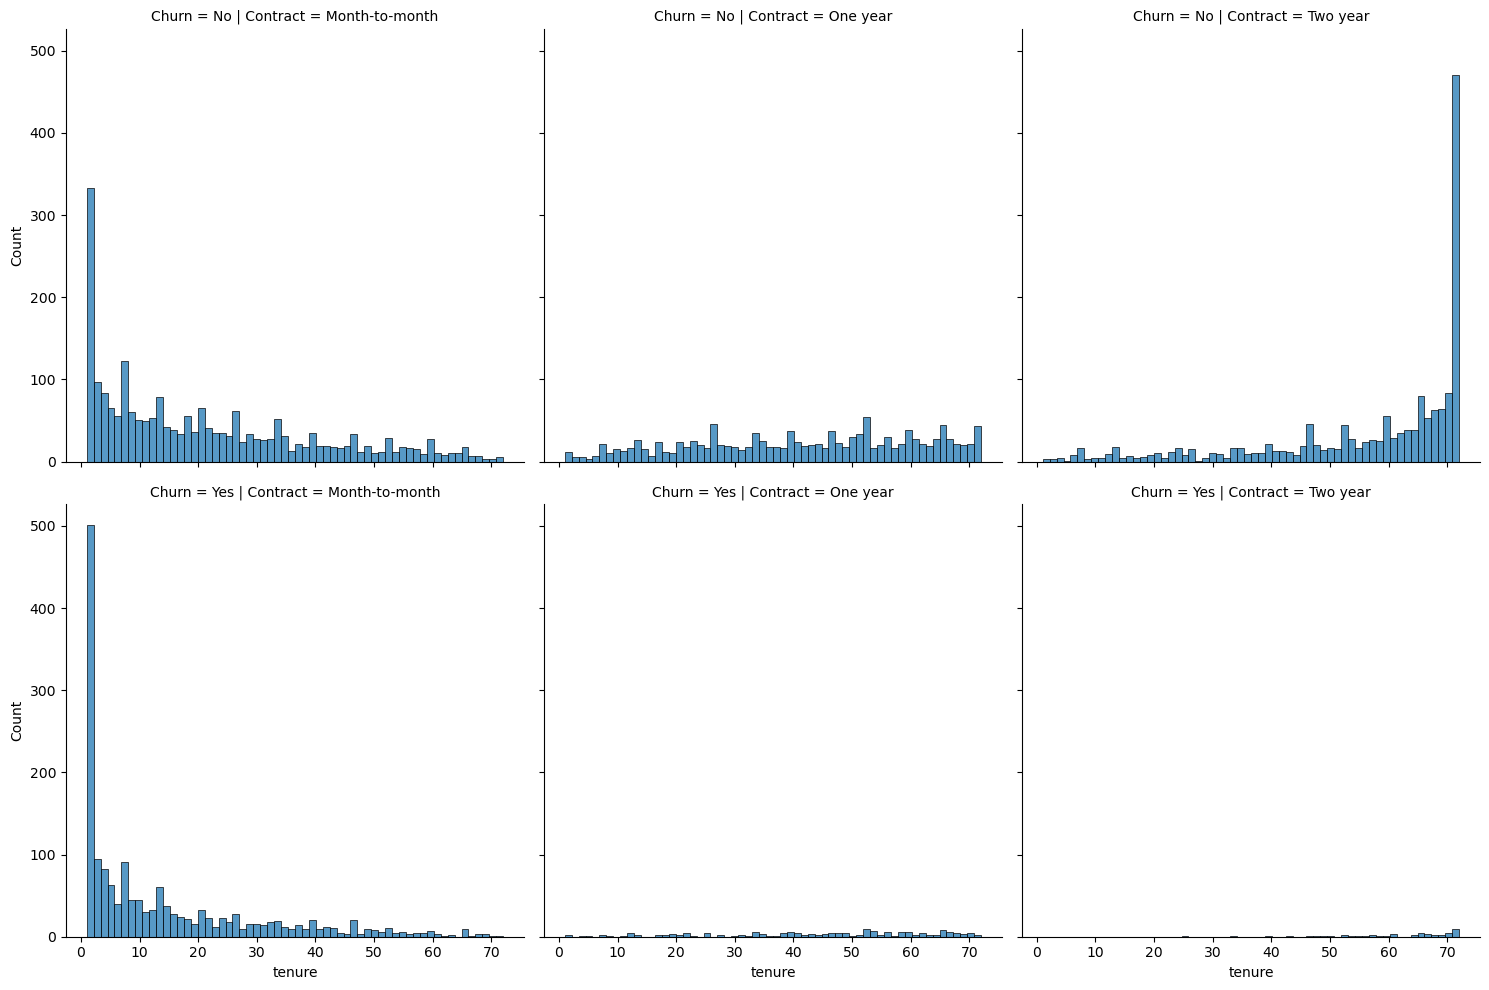

In [64]:
sns.displot(data=df,x='tenure',bins=60,col='Contract',row='Churn')

As we can see there are limited customers that churn for one or two year contracts

### Let's explore the corallation of Total Charges versus Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

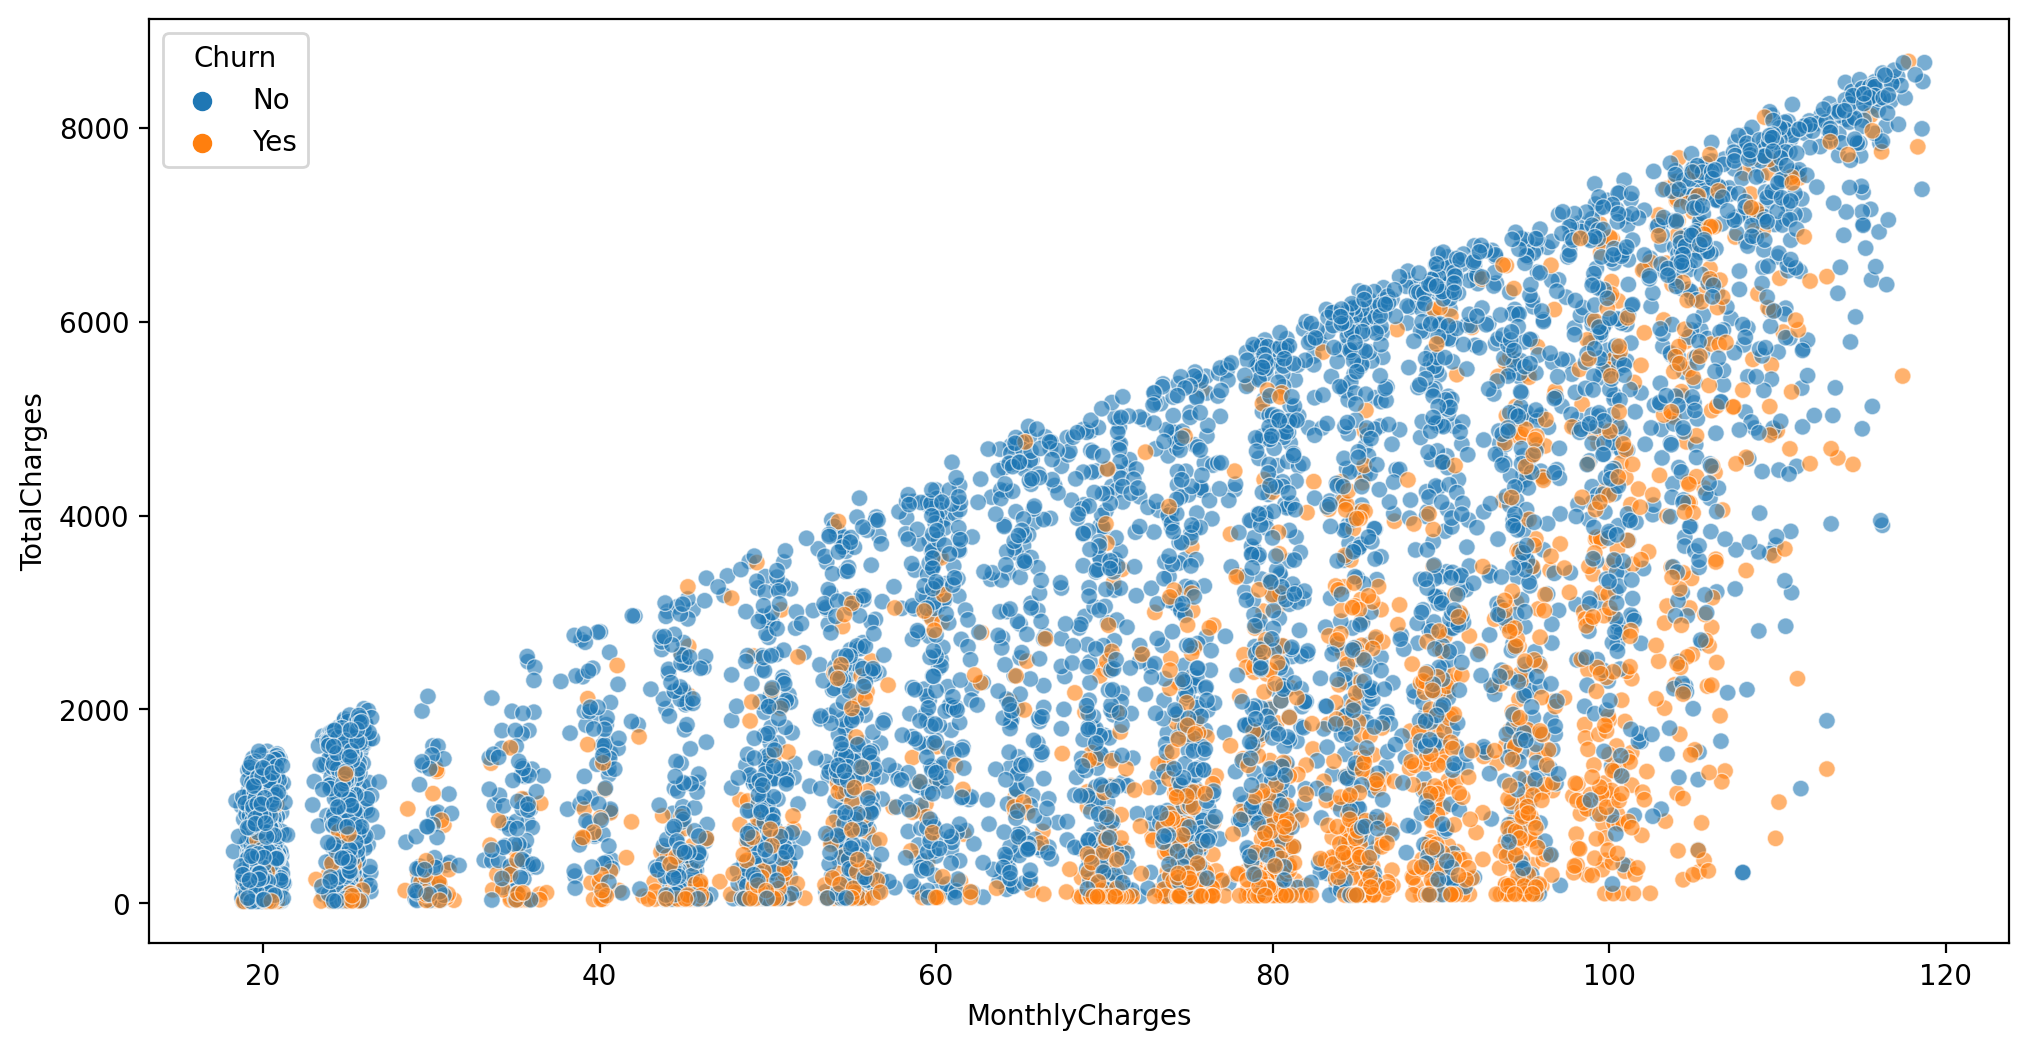

In [71]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',hue="Churn",alpha=0.6)

It is obvious that there is a corralation for customers with high Monthly Charges and churn.

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

In [9]:
churn_yes = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_no = df.groupby(['Churn','tenure']).count().transpose()['No']

In [10]:
churn_yes

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [11]:
churn_rate = 100*churn_yes/(churn_yes+churn_no)
churn_rate = churn_rate.transpose()['customerID']
churn_rate = pd.DataFrame(churn_rate)
churn_rate.rename(columns={'customerID': 'Churn Percentage'},inplace=True)
churn_rate

,Churn Percentage
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


**And we plot it out for better visual undestanding.**

<AxesSubplot:xlabel='tenure', ylabel='Churn Percentage'>

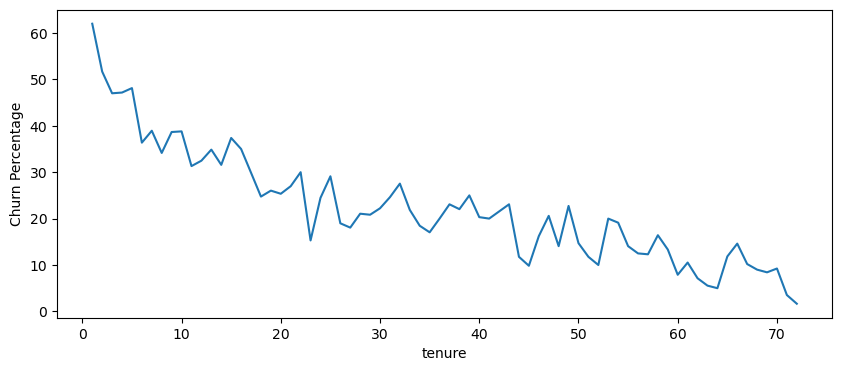

In [91]:
plt.figure(figsize=(10,4))
sns.lineplot(data=churn_rate,x='tenure',y='Churn Percentage')

**It is clear that the more the customer stays in the service the possibility to churn drops.
Maybe a follow-up with a special offer for customers who drop-off at the first months, or a competitive package for a longer period contract would be a good idea.**

### Let's see some broader cohort groups, that the company could focus.
**We will create 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [12]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '25-48 Months'
    else:
        return 'Over 48 Months'

In [13]:
df['tenure'].apply(cohort).value_counts()

Over 48 Months    2239
0-12 Months       2175
25-48 Months      1594
12-24 Months      1024
Name: tenure, dtype: int64

In [14]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,25-48 Months,34
2,0-12 Months,2
3,25-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**Let's see the corellation of Total Charges versus Monthly Charts by Tenure Cohort we have created, as before**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

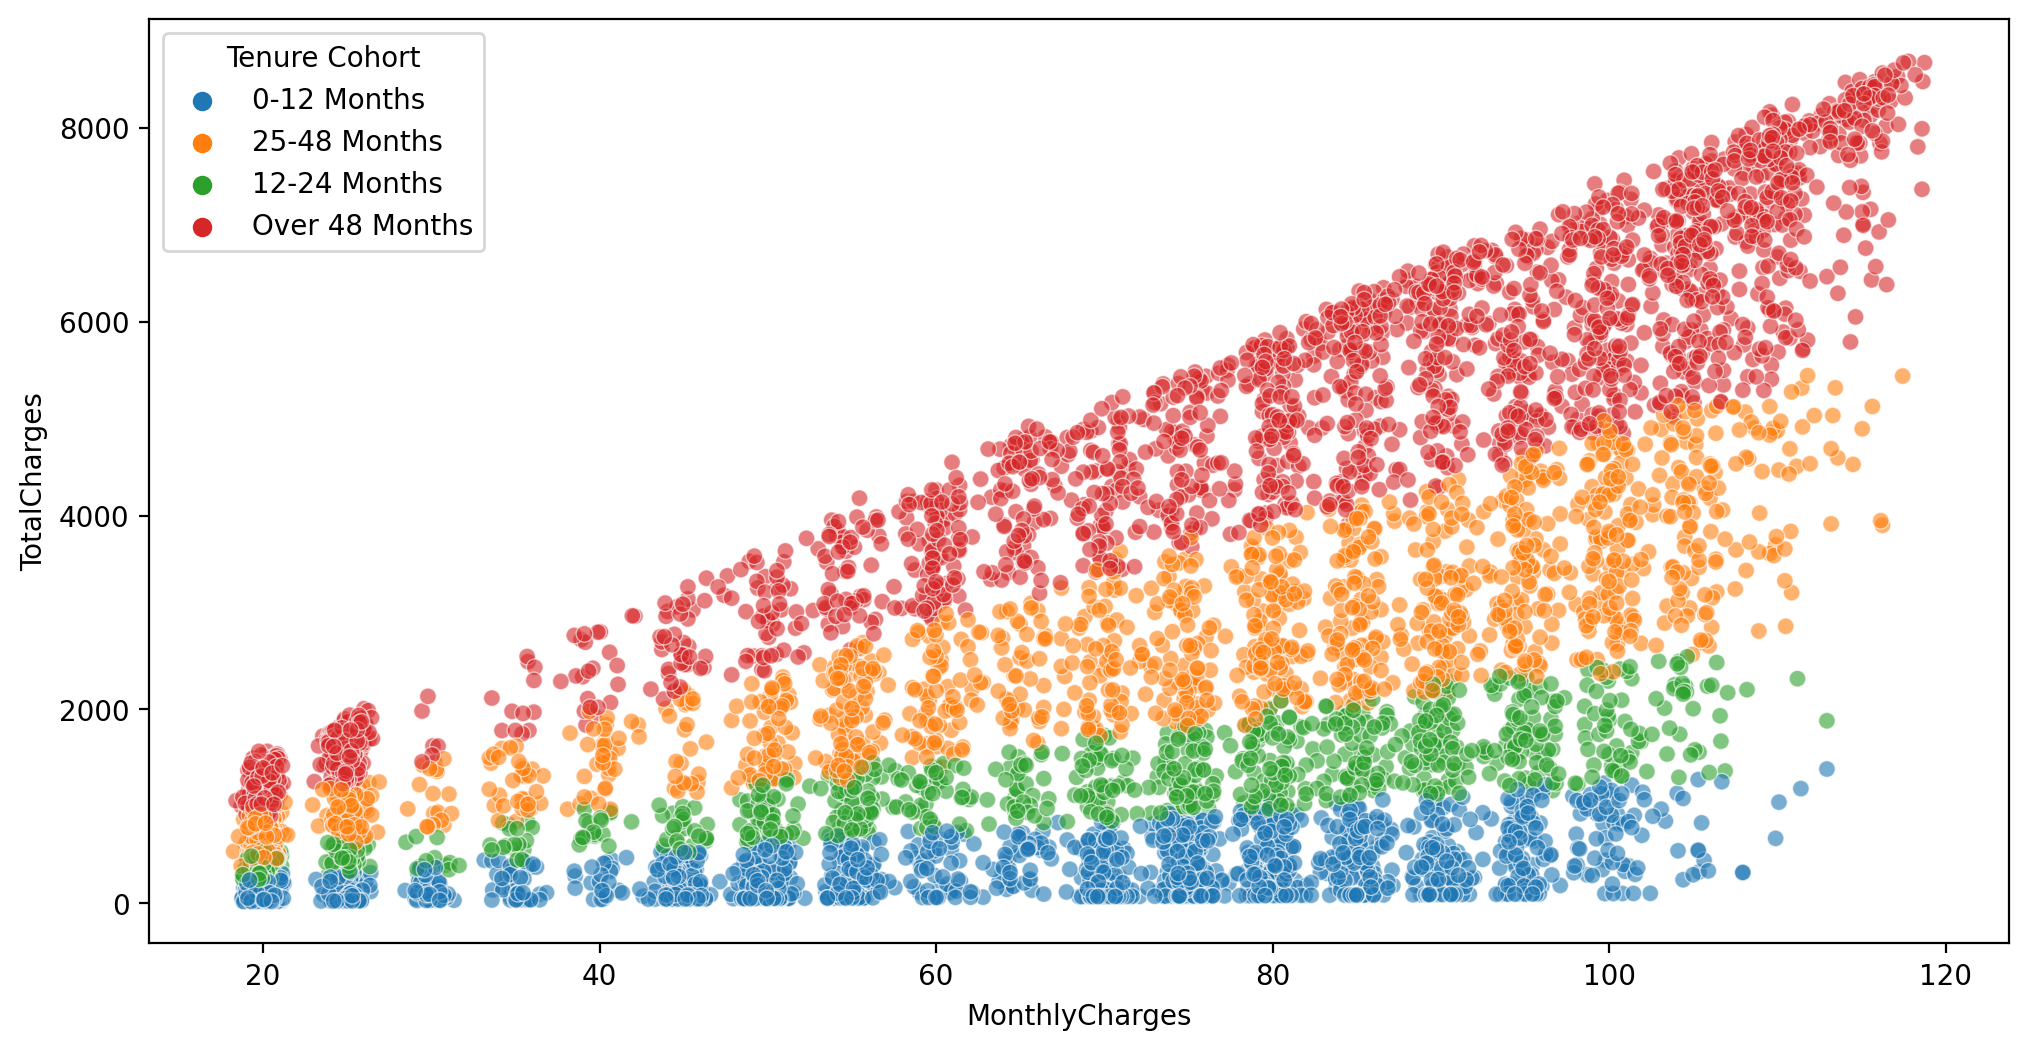

In [98]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',hue="Tenure Cohort",alpha=0.6)

the scatterplot makes sense and presents that the more the customers stay in service the more they are charged

**With the count plot bellow we see the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

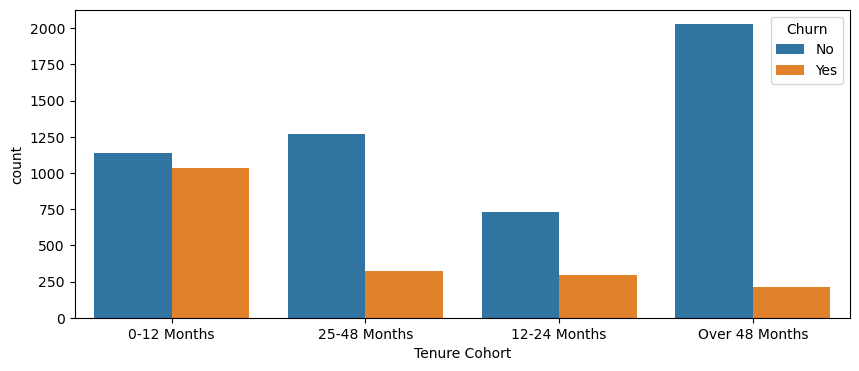

In [101]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Tenure Cohort',hue='Churn')

we verify that the more the customer stay on the service they are unlikely to churn

**And depending on the contract type.**

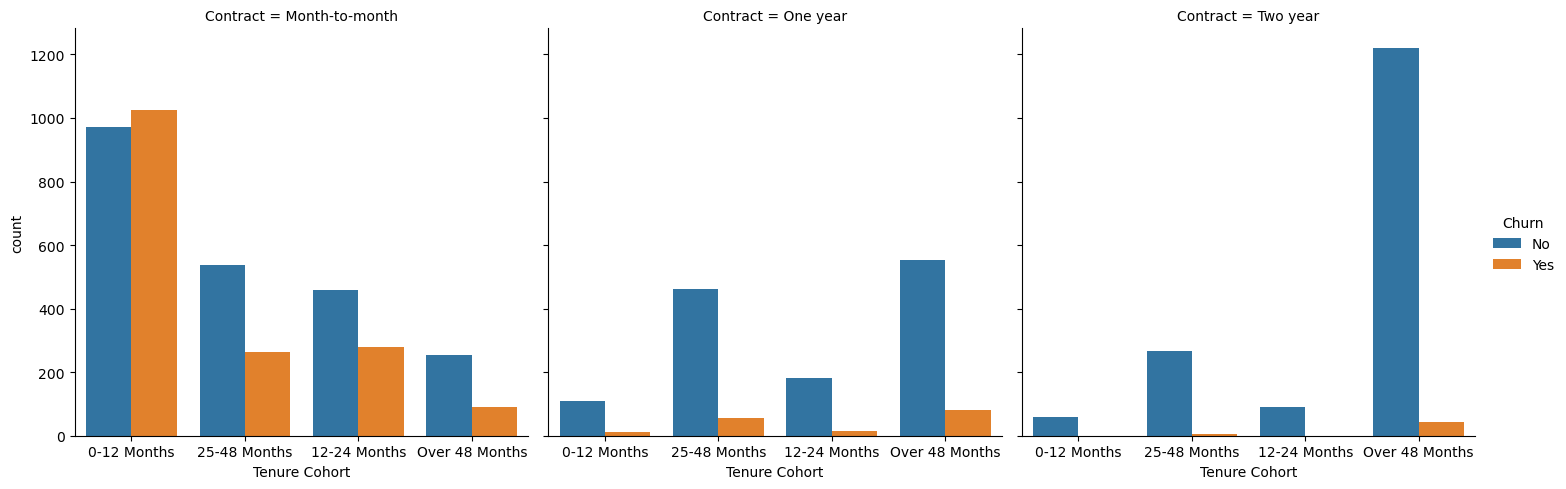

In [106]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

we can see again from the above diagramms that there is a corralation for the month-to-month contract with churn, and by the contract type. The longer the contract the less the churn.

-----

## Lastly we will examine the best Predictive Model for our case

**We will explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


### Single Decision Tree

**First we separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [15]:
X = df.drop(['Churn','customerID'],axis=1)
# we drop the customerID col because we don't need it and because when we get dummies will make about 7000 columns and slow the computation

In [16]:
X = pd.get_dummies(X,drop_first=True)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_25-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [17]:
y = df['Churn']

**We perform a train test split, holding out 15% of the data for testing. We'll use a random_state of 101.**

In [44]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier(max_depth=6)

In [63]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [64]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [67]:
preds = dt.predict(X_test)

In [68]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87       799
         Yes       0.61      0.50      0.55       256

    accuracy                           0.80      1055
   macro avg       0.73      0.70      0.71      1055
weighted avg       0.79      0.80      0.79      1055



### Insights:
- the model have high accuracy for the no_churn parameter but low for yes_churn
- which is normal because we have more measures for the no_churn than for yes_churn
- overall accuracy is 81% which is somehow low

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


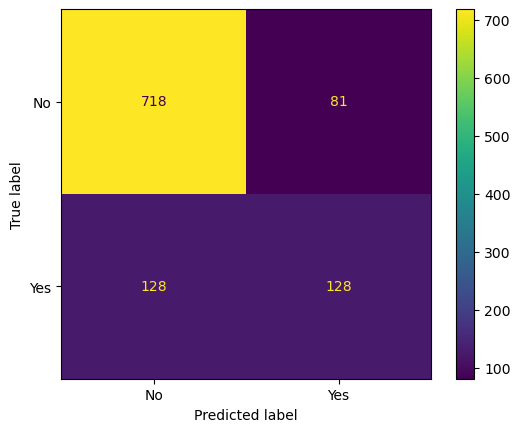

In [69]:
plot_confusion_matrix(dt,X_test,y_test)

***we can see that the error is high especially for the yes_churn predictions***

In [70]:
imp_feat = pd.DataFrame(data=dt.feature_importances_, index=X.columns,columns=['Feat Importance'])
imp_feat = imp_feat[imp_feat['Feat Importance']>0]
imp_feat = imp_feat.sort_values('Feat Importance')
imp_feat

,Feat Importance
PaymentMethod_Credit card (automatic),0.000495
PhoneService_Yes,0.001017
Partner_Yes,0.001325
StreamingTV_Yes,0.002800
OnlineBackup_Yes,0.006441
MultipleLines_No phone service,0.007042
Contract_One year,0.007909
PaperlessBilling_Yes,0.008630
TechSupport_Yes,0.010016
SeniorCitizen,0.011141


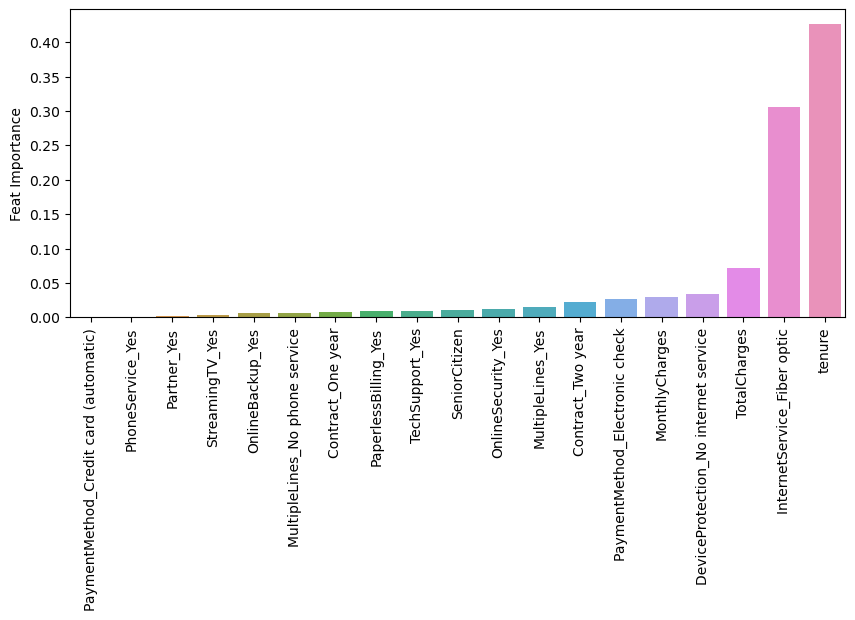

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(data=imp_feat,y='Feat Importance',x=imp_feat.index)
plt.xticks(rotation=90);

**we can see that except tenure there are other features that are important for churn such us Internet Service Fiber Optic**

In [33]:
# let's plot and the  decission tree
from sklearn.tree import plot_tree

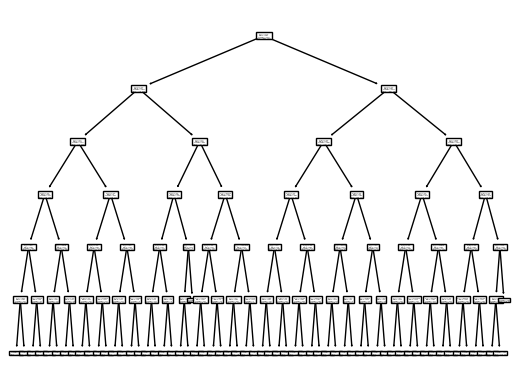

In [32]:
plot_tree(dt,);

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
rf_preds = rf.predict(X_test)

In [77]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86       799
         Yes       0.58      0.48      0.52       256

    accuracy                           0.79      1055
   macro avg       0.71      0.68      0.69      1055
weighted avg       0.78      0.79      0.78      1055



**A little worst than the Single Decision Tree
Let's change the max_depth and see what will happen**

In [78]:
rf = RandomForestClassifier(max_depth=8)

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [80]:
rf_preds = rf.predict(X_test)

In [81]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.85      0.92      0.89       799
         Yes       0.68      0.51      0.58       256

    accuracy                           0.82      1055
   macro avg       0.77      0.72      0.74      1055
weighted avg       0.81      0.82      0.81      1055



**A littile better but not that good with accuracy 82%**

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


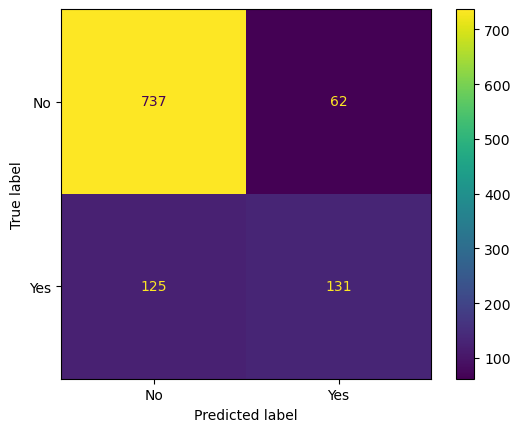

In [82]:
plot_confusion_matrix(rf,X_test,y_test)

### Boosted Trees

**We will use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results to see if we can have a better performance**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [84]:
ada_model = AdaBoostClassifier()

In [85]:
gb_model = GradientBoostingClassifier()

In [86]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [87]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [88]:
ada_preds = ada_model.predict(X_test)

In [89]:
gb_preds = gb_model.predict(X_test)

In [90]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       799
         Yes       0.68      0.56      0.62       256

    accuracy                           0.83      1055
   macro avg       0.78      0.74      0.75      1055
weighted avg       0.82      0.83      0.82      1055



In [91]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.86      0.91      0.88       799
         Yes       0.66      0.52      0.58       256

    accuracy                           0.82      1055
   macro avg       0.76      0.72      0.73      1055
weighted avg       0.81      0.82      0.81      1055



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


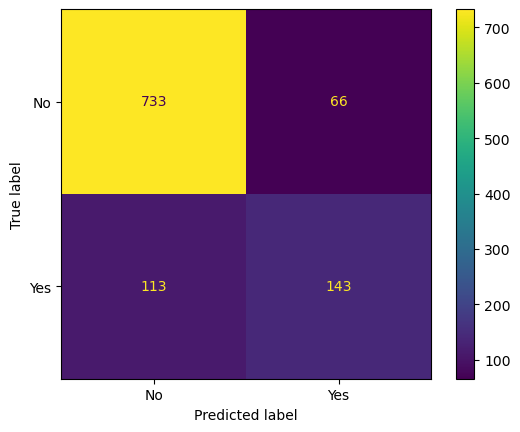

In [92]:
plot_confusion_matrix(ada_model,X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


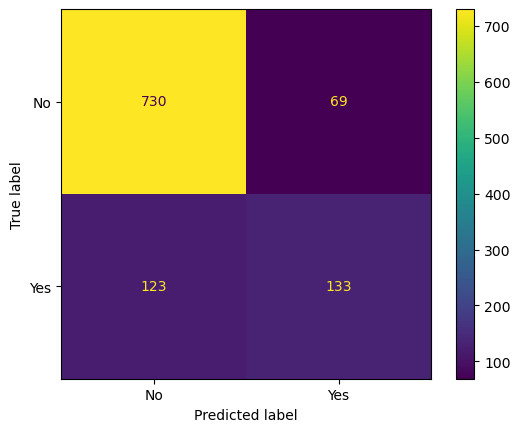

In [93]:
plot_confusion_matrix(gb_model,X_test,y_test)

**The AdaBoost have a beter behavior for my prediction model but ovelall all the models because of the unbalanced data for churn are a little inaccurate**

**With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!